Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [27]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [28]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('gdrive/My Drive/ColabNotebooks/Data/melonama/Train/')
data_dir_test = pathlib.Path('gdrive/My Drive/ColabNotebooks/Data/melonama/Test/')

In [29]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [30]:
!ls "gdrive/My Drive/ColabNotebooks/Data/melonama/Train/"

'actinic keratosis'	 melanoma		      'seborrheic keratosis'
'basal cell carcinoma'	 nevus			      'squamous cell carcinoma'
 dermatofibroma		'pigmented benign keratosis'  'vascular lesion'


### Create a dataset

Define some parameters for the loader:

In [31]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [32]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
image_size = (img_height, img_width)
#batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
) 

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [33]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
) 

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [34]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

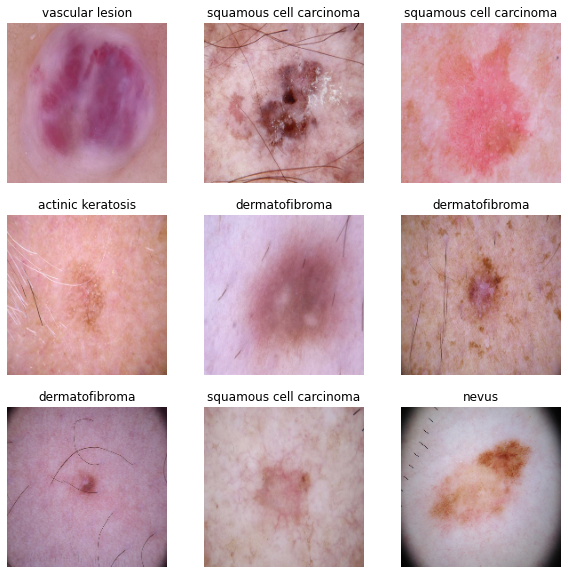

In [35]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [36]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [37]:
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
### Your code goes here

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [38]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [39]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       

### Train the model

In [40]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 7s 25ms/step - loss: 1.1910 - accuracy: 0.5604 - val_loss: 1.0639 - val_accuracy: 0.6119
Epoch 3/20
281/281 [==============================] - 7s 24ms/step - loss: 0.9425 - accuracy: 0.6584 - val_loss: 0.8302 - val_accuracy: 0.7085
Epoch 4/20
281/281 [==============================] - 7s 24ms/step - loss: 0.7009 - accuracy: 0.7527 - val_loss: 0.7481 - val_accuracy: 0.7401
Epoch 5/20
281/281 [==============================] - 7s 24ms/step - loss: 0.5466 - accuracy: 0.8087 - val_loss: 0.5584 - val_accuracy: 0.7988
Epoch 6/20
281/281 [==============================] - 7s 24ms/step - loss: 0.4324 - accuracy: 0.8455 - val_loss: 0.5402 - val_accuracy: 0.8180
Epoch 7/20
281/281 [==============================] - 7s 24ms/step - loss: 0.3325 - accuracy: 0.8838 - val_loss: 0.5289 - val_accuracy: 0.8242
Epoch 8/20
281/281 [==============================] - 7s 24ms/step - loss: 0.2671 - accuracy: 0.9083 - val_loss: 0.4234 - val_accuracy: 0.8714

### Visualizing training results

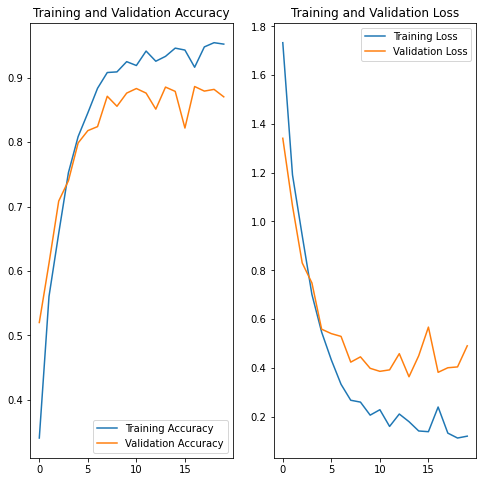

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [42]:
### Visualizing supplied input data

import glob
path_list = [x for x in data_dir_train.glob('*')]
path_list.sort()
cnt = 0
img_cnt_lst = []
lbl_list = []
for pathval in path_list:
  path_val= pathlib.Path(pathval) #pathlib.Path('gdrive/My Drive/ColabNotebooks/Data/melonama/Train/')
  dpath_val=os.path.join(path_val,'')
  ln = len(list(pathlib.Path(os.path.join(path_val,'')).glob('*.jpg')))
  #print (ln, class_names[cnt])
  img_cnt_lst.append(ln)
  lbl_list.append(class_names[cnt])
  cnt = cnt + 1
  #print(list(path_val.glob('*/*')))

In [43]:
dict_img = dict(zip(class_names, img_cnt_lst))
df_img = pd.DataFrame(list(dict_img.items()),columns = ['Lbl','Cnt'])

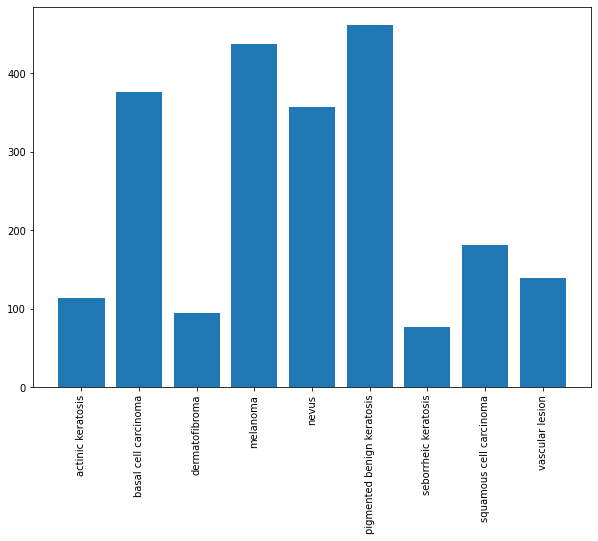

In [44]:
### Plotting input data as bar plot to understand the data distribution
lbl = df_img['Lbl']
cnt = df_img['Cnt']
# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.bar(lbl, cnt)
plt.xticks(rotation=90)
plt.show()

In [45]:
## There is skewness observed in data from above bar plot

In [46]:
## Model performane Observation:::
## The model shows overfitting clearly. 
## Also the accuracy is not good.

In [47]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

In [49]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

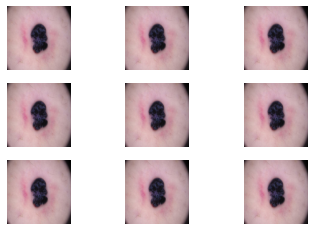

In [50]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [51]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

### Compiling the model

In [52]:
## Your code goes here
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Training the model

In [53]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 12s 40ms/step - loss: 1.9020 - accuracy: 0.2615 - val_loss: 1.4841 - val_accuracy: 0.4134
Epoch 2/20
281/281 [==============================] - 11s 40ms/step - loss: 1.4092 - accuracy: 0.4659 - val_loss: 1.3310 - val_accuracy: 0.5140
Epoch 3/20
281/281 [==============================] - 11s 39ms/step - loss: 1.2656 - accuracy: 0.5155 - val_loss: 1.1846 - val_accuracy: 0.5554
Epoch 4/20
281/281 [==============================] - 11s 39ms/step - loss: 1.1856 - accuracy: 0.5532 - val_loss: 1.0925 - val_accuracy: 0.5928
Epoch 5/20
281/281 [==============================] - 11s 39ms/step - loss: 1.0842 - accuracy: 0.5911 - val_loss: 1.0648 - val_accuracy: 0.5950
Epoch 6/20
281/281 [==============================] - 11s 39ms/step - loss: 1.0452 - accuracy: 0.6028 - val_loss: 0.9241 - val_accuracy: 0.6538
Epoch 7/20
281/281 [==============================] - 11s 39ms/step - loss: 0.9607 - accuracy: 0.6433 - val_loss: 0.9224 - val_accuracy:

### Visualizing the results

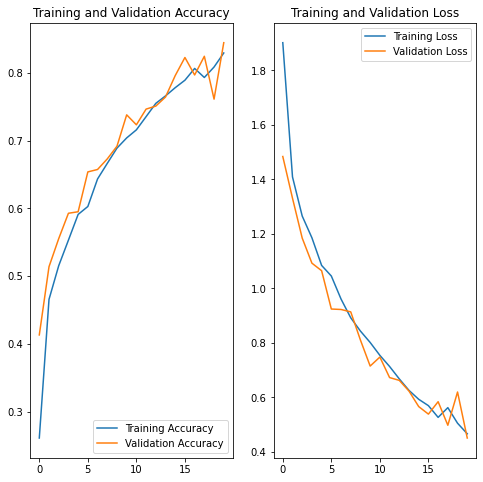

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [56]:
#3 Model Performance Observation after augmentation and dropout::
## The model is now behaving more generalized (overfitting reduced) as such but model accuracy can be improved further

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

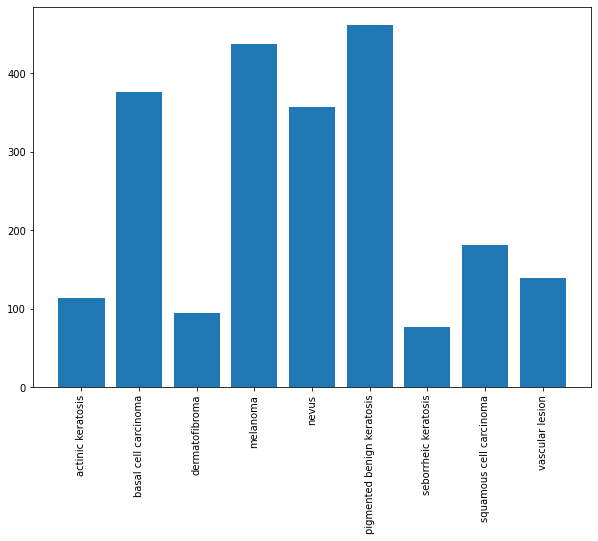

In [57]:
## Your code goes here.
### Plotting input data as bar plot to understand the data distribution
lbl = df_img['Lbl']
cnt = df_img['Cnt']
# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.bar(lbl, cnt)
plt.xticks(rotation=90)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [58]:
## From above bar plot 'seborrheic keratosis' is having least number.
## 'pigmented benign keratosis' is dominating in the mix

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [59]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
## Checking for existence of Augmented output and if exists then delete the old augmented output
import shutil
for dir_class in class_names:
  outputsub = dir_class +'/output/'
  srcdir = os.path.join("gdrive/My Drive/ColabNotebooks/Data/melonama/Train/", outputsub)
  #filesout = os.listdir(srcdir)
  #print(filesout)
  #for fls 
  if os.path.exists(srcdir):
    shutil.rmtree(srcdir)
    #os.remove(filesout)

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [105]:
path_to_training_dataset= 'gdrive/My Drive/ColabNotebooks/Data/melonama/Train/' #"To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/ColabNotebooks/Data/melonama/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F55168F4C40>: 100%|██████████| 500/500 [00:18<00:00, 27.70 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/ColabNotebooks/Data/melonama/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5499ED4F40>: 100%|██████████| 500/500 [00:16<00:00, 29.64 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/ColabNotebooks/Data/melonama/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F549B5FD400>: 100%|██████████| 500/500 [00:18<00:00, 27.74 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/ColabNotebooks/Data/melonama/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F54985E1100>: 100%|██████████| 500/500 [01:35<00:00,  5.25 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/ColabNotebooks/Data/melonama/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=576x768 at 0x7F549B16DB50>: 100%|██████████| 500/500 [01:35<00:00,  5.25 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/ColabNotebooks/Data/melonama/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F549AFF0BE0>: 100%|██████████| 500/500 [00:18<00:00, 27.08 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/ColabNotebooks/Data/melonama/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F549B07DA60>: 100%|██████████| 500/500 [00:39<00:00, 12.77 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/ColabNotebooks/Data/melonama/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5499ECE340>: 100%|██████████| 500/500 [00:17<00:00, 28.59 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/ColabNotebooks/Data/melonama/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F54998EDA00>: 100%|██████████| 500/500 [00:18<00:00, 27.43 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [106]:
# checking if the directory augmented train folder 
# exist or not. Based on the same either remove and create or only create the folder

if not os.path.exists("gdrive/My Drive/ColabNotebooks/Data/melonama/Trainaug/"):
  # if the directory is not present
  # then create it.
  os.makedirs("gdrive/My Drive/ColabNotebooks/Data/melonama/Trainaug/")
else:
  shutil.rmtree("gdrive/My Drive/ColabNotebooks/Data/melonama/Trainaug/")
  os.makedirs("gdrive/My Drive/ColabNotebooks/Data/melonama/Trainaug/")
for dirclass in class_names:
  subdir = dirclass +'/'
  path = os.path.join("gdrive/My Drive/ColabNotebooks/Data/melonama/Trainaug/", subdir) 
  if not os.path.exists(path):
    os.makedirs(path)

In [107]:
# Copying augmented files to new training directory
import shutil
for dirclass in class_names:
  outputsub = dirclass +'/output/'
  src_dir = os.path.join("gdrive/My Drive/ColabNotebooks/Data/melonama/Train/", outputsub)
  subdirpath = dirclass +'/'
  dest_dir = os.path.join("gdrive/My Drive/ColabNotebooks/Data/melonama/Trainaug/",   subdirpath)
  files = os.listdir(src_dir)
  #print(files)
  for filenm in files:
    src_file = os.path.join(src_dir,filenm)
    shutil.copy(src_file, dest_dir)
  #shutil.copytree(src_dir, dest_dir)

#### **Todo**: Train the model on the data created using Augmentor

In [108]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [109]:
#data_dir_train= pathlib.Path(testpath) #"path to directory with training data + data created using augmentor"
data_dir_train_aug = pathlib.Path('gdrive/My Drive/ColabNotebooks/Data/melonama/Trainaug/')
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(180, 180),
  batch_size=32)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [110]:
val_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(180, 180),
  batch_size=32)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [111]:
## your code goes here
num_classes  = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [112]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [113]:
epochs = 30
## Your code goes here, use 50 epochs.
# your model fit code
history = model.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 17s 135ms/step - loss: 2.1135 - accuracy: 0.2044 - val_loss: 1.9047 - val_accuracy: 0.2867
Epoch 2/30
113/113 [==============================] - 16s 134ms/step - loss: 1.7989 - accuracy: 0.3019 - val_loss: 1.6321 - val_accuracy: 0.3756
Epoch 3/30
113/113 [==============================] - 16s 134ms/step - loss: 1.5104 - accuracy: 0.4347 - val_loss: 1.4714 - val_accuracy: 0.4478
Epoch 4/30
113/113 [==============================] - 16s 134ms/step - loss: 1.3323 - accuracy: 0.5186 - val_loss: 1.3548 - val_accuracy: 0.5289
Epoch 5/30
113/113 [==============================] - 16s 133ms/step - loss: 1.1998 - accuracy: 0.5578 - val_loss: 1.2603 - val_accuracy: 0.5411
Epoch 6/30
113/113 [==============================] - 17s 141ms/step - loss: 1.0633 - accuracy: 0.6100 - val_loss: 1.1269 - val_accuracy: 0.6078
Epoch 7/30
113/113 [==============================] - 16s 134ms/step - loss: 1.0036 - accuracy: 0.6456 - val_loss: 1.1622 - val_ac

#### **Todo:**  Visualize the model results

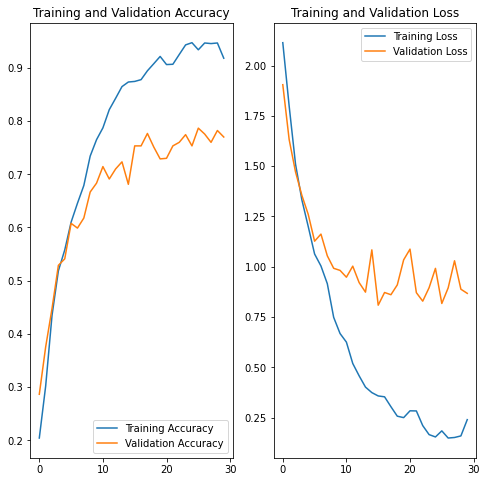

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [116]:
## Class rebalance help in addressing underfitting. However, overfitting still exists. There is improvement in accuracy both for training and validation set.
## There is a scope of further improvement. Perhaps using larger sample size, increase in neurons, more generalization through drop out layers and slight increase in depth to bring abstract